<a href="https://colab.research.google.com/github/Aditib2409/EE541_Deep_Learning/blob/main/Copy_of_chords_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram, find_peaks
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/Shareddrives/EE541Project/archive.zip"

Archive:  /content/drive/Shareddrives/EE541Project/archive.zip
  inflating: Audio_Files/Major/Major_0.wav  
  inflating: Audio_Files/Major/Major_1.wav  
  inflating: Audio_Files/Major/Major_10.wav  
  inflating: Audio_Files/Major/Major_100.wav  
  inflating: Audio_Files/Major/Major_101.wav  
  inflating: Audio_Files/Major/Major_102.wav  
  inflating: Audio_Files/Major/Major_103.wav  
  inflating: Audio_Files/Major/Major_104.wav  
  inflating: Audio_Files/Major/Major_105.wav  
  inflating: Audio_Files/Major/Major_106.wav  
  inflating: Audio_Files/Major/Major_107.wav  
  inflating: Audio_Files/Major/Major_108.wav  
  inflating: Audio_Files/Major/Major_109.wav  
  inflating: Audio_Files/Major/Major_11.wav  
  inflating: Audio_Files/Major/Major_110.wav  
  inflating: Audio_Files/Major/Major_111.wav  
  inflating: Audio_Files/Major/Major_112.wav  
  inflating: Audio_Files/Major/Major_113.wav  
  inflating: Audio_Files/Major/Major_114.wav  
  inflating: Audio_Files/Major/Major_115.wav  
  i

### Loading Dataset

In [ ]:
class loading_dataset:
    def __init__(self, path):
        self.path = path

    def harmonics(self, file_path, print=False):
        freq, X = wavfile.read(file_path)
        n = len(X)
        X_fourier = fft(X)
        X_fourier_onesided = 2.0/n * np.abs(X_fourier[0:n // 2])
        frequencies = fftfreq(n, 1/freq)[:n//2]
        freqs_50_index = np.argmin(np.abs(frequencies - 50))
        
        ht = np.max(X_fourier_onesided)*5/100
        peaks_found, _ = find_peaks(X_fourier_onesided, distance=10, height = ht)
        peaks_found = peaks_found[peaks_found>freqs_50_index]
        harmonics_found = np.round(frequencies[peaks_found],2)
        
        if print:
            p = np.max(peaks_found) + 100
            plt.plot(frequencies[:p], X_fourier_onesided[:p])
            plt.plot(frequencies[peaks_found], X_fourier_onesided[peaks_found], 'o')
            plt.xlabel(f'Frequency in Hz')
            plt.ylabel(f'Harmonics')
            plt.show()
        
        return harmonics_found

    
    def create_dataframe(self):
        # to track the length of a harmonic
        length_harmonic = 0
        dataset = []

        for dir_name, _, file_name in os.walk(self.path):
            for filename in file_name:
                folder_name = os.path.basename(dir_name)
                full_filepath = os.path.join(dir_name, filename)
                harmonic_peaks = self.harmonics(full_filepath)
                min_harmonics = harmonic_peaks.min()
                max_harmonics = harmonic_peaks.max()
                num_peaks = len(harmonic_peaks)
                length_harmonic = max(num_peaks, length_harmonic)
                current_data = [folder_name, filename, min_harmonics, max_harmonics, num_peaks] 
                current_data.extend(harmonic_peaks)

                dataset.append(current_data)

        feature_cols = ["Chord_type", "File_name", "Minimum_harmonic", "Maximum harmonic", "Num_harmonics"]
        for i in range(length_harmonic):
            feature_cols.append(f'Harmonic {i+1}')

        data_df = pd.DataFrame(dataset, columns=feature_cols)

        return data_df

In [ ]:
path = "/content/Audio_Files"
dataloader = loading_dataset(path)
data = dataloader.create_dataframe()
data_og = data

In [ ]:
def plot_kde(I, df):
    rows = len(I)
    fig, axes = plt.subplots(nrows=rows, ncols=1, figsize=(8, 15), sharex=True)
    colors = ['red', 'green']
    for i in range(rows):
        sns.kdeplot(ax=axes[i], data=df, x=I[i], hue="Chord_type", shade=True, palette="Set2")
        axes[i].set_title(f'{I[i]} density plot')
    plt.show()

### Creating intervals

In [ ]:
intervals = ["octave", "quinta", "quarta", "major inertia", "minor inertia"]
for i in range(len(intervals)):
    data[intervals[i]] = np.divide(data[f'Harmonic {i+2}'], data[f'Harmonic {i+1}'])

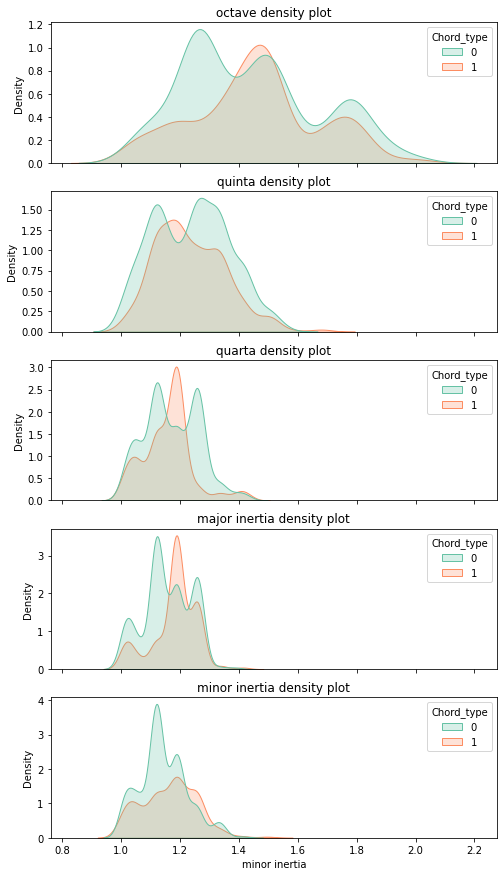

In [ ]:
plot_kde(intervals, data)

In [ ]:
# get the corresponding intervals

data["Chord_type"] = data["Chord_type"].replace("Major", 0)
data["Chord_type"] = data["Chord_type"].replace("Minor", 1)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(data[intervals], data['Chord_type'], test_size=0.30, random_state=42)

In [ ]:
train_x.head(5)

,octave,quinta,quarta,major inertia,minor inertia
28,1.260585,1.418249,1.118641,1.124263,1.122627
457,1.486470,1.345401,1.121624,1.116478,1.187042
193,1.505886,1.188346,1.119275,1.258415,1.194885
367,1.337857,1.257646,1.188671,1.122449,1.192932
467,1.874398,1.061484,1.260501,1.158696,1.023414


In [ ]:
val_x.head(5)

,octave,quinta,quarta,major inertia,minor inertia
714,1.336118,1.189068,1.258893,1.122128,1.189752
605,1.505657,1.258091,1.055791,1.260005,1.195000
120,1.888855,1.060662,1.256530,1.193081,1.119080
208,1.504632,1.187226,1.119610,1.261579,1.193872
380,1.575987,1.122946,1.124251,1.260501,1.190003


(258, 5)

# Model Implementation


## 1) Random Forest


## 2) Naive Bayes

## 3) SVM: Linear Kernel

##4) SVM: Polynomial Kernel

## 5) Nerual Network